In [ ]:
pip install boruta

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from boruta import BorutaPy

In [2]:
#Reading csv file 1
secom_labels_data='https://raw.githubusercontent.com/hugo-am/SECOM_HTWG2/refs/heads/Rebekah/secom_labels.data'
labels=pd.read_csv(secom_labels_data,header=None,sep=' ',names=['status','timestamp'])

In [3]:
#Generate an empty list to put column names in
column_list=[]

In [4]:
#Naming columns 0-590
for x in range(591):
    column_list.append(f'col{x}')

In [5]:
#Remove the first column name as it starts with 0
column_list.remove('col0')

In [6]:
#Reading csv file 2
secom_data='https://raw.githubusercontent.com/hugo-am/SECOM_HTWG2/refs/heads/Rebekah/secom.data'
data=pd.read_csv(secom_data,header=None,sep=' ',names=column_list)

In [7]:
#Data file has 590 columns and 1567 rows
print(data.shape)
data.head()

(1567, 590)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col581,col582,col583,col584,col585,col586,col587,col588,col589,col590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [8]:
#Generate base dataframe
df=data.merge(labels,left_index=True,right_index=True)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col583,col584,col585,col586,col587,col588,col589,col590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


Missing Values Treatment - Remove 8 Features

In [9]:
#Missing values, Drop the 'status' and 'timestamp' columns
missing = df.drop(columns=['status', 'timestamp']).isna().sum().sort_values(ascending=False)

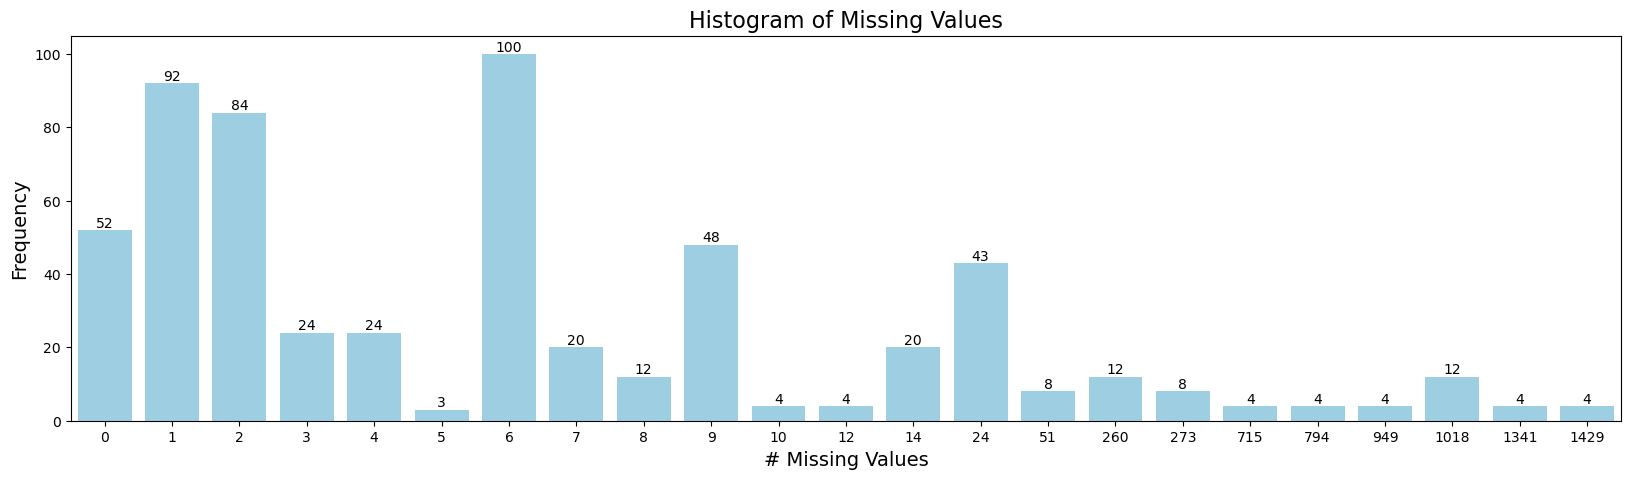

In [10]:
# Sort the missing value counts in descending order
missing_counts = missing.value_counts().sort_values(ascending=False)

# Plot the sorted histogram with axis labels
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, color='skyblue')  # Set bar color to blue
plt.xlabel("# Missing Values", fontsize=14)  # Label for x-axis
plt.ylabel("Frequency", fontsize=14)        # Label for y-axis
plt.title("Histogram of Missing Values", fontsize=16)  # Title for the plot

# Add label markers above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.show()

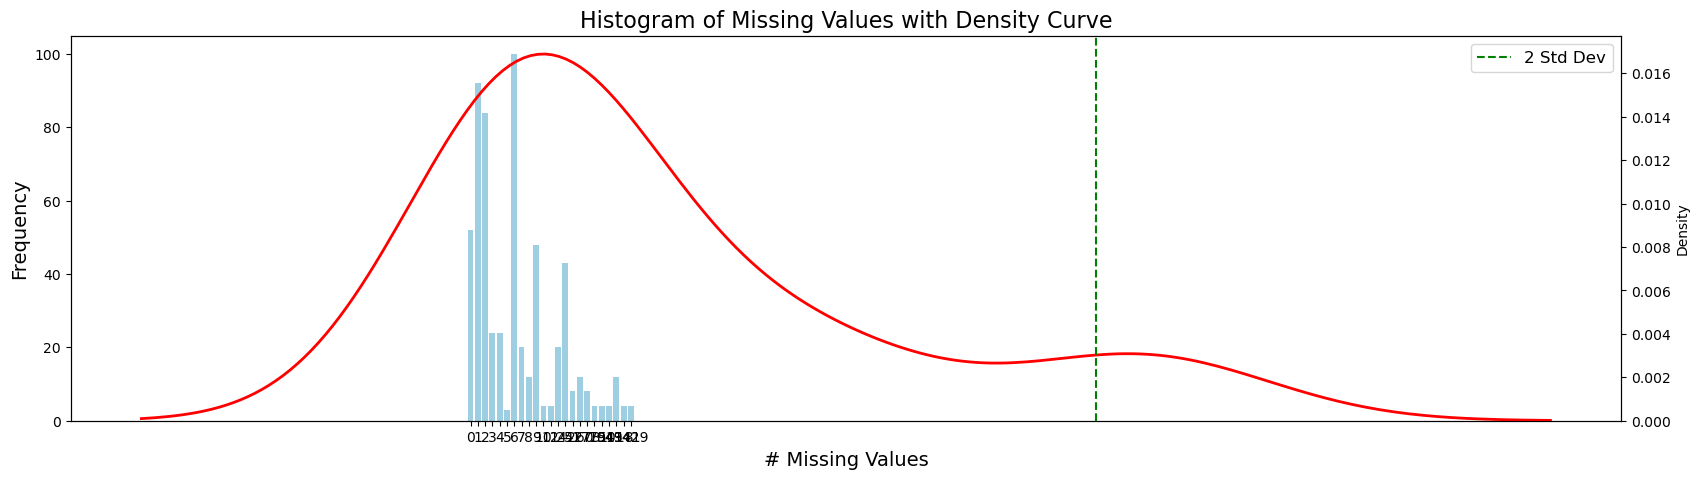

In [11]:
# Plot the histogram of missing values - DID NOT END UP USING THIS IN PRESENTATION DUE TO CURVE SHAPE
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, color='skyblue')  # Set bar color to blue
plt.xlabel("# Missing Values", fontsize=14)  # Label for x-axis
plt.ylabel("Frequency", fontsize=14)        # Label for y-axis
plt.title("Histogram of Missing Values with Density Curve", fontsize=16)  # Title for the plot

# Plot the density curve
sns.kdeplot(missing_counts.values, color='red', linewidth=2, ax=ax.twinx())  # Use a secondary y-axis for the density curve

# Calculate the 2 standard deviation line
std_dev = missing_counts.std()
mean_value = missing_counts.mean()
two_std_line = mean_value + 2 * std_dev

# Add a vertical line at the 2 standard deviation mark
plt.axvline(x=two_std_line, color='green', linestyle='--', linewidth=1.5, label='2 Std Dev')

# Add legend
plt.legend(loc='upper right', fontsize=12)

plt.show()

In [12]:
# Calculate +3 and -3 standard deviations of missing VALUES to determine what % of missing values can be considered outliers and inform threshold for removal
plus_3_std = mean_value + 3 * std_dev
minus_3_std = mean_value - 3 * std_dev

print(f"+3 Standard Deviations: {plus_3_std}")
print(f"-3 Standard Deviations: {minus_3_std}")

+3 Standard Deviations: 115.82296048490468
-3 Standard Deviations: -64.51861265881774


In [13]:
#Analyze missing value basic counts and percentages (Avg Missing, Top 20% Pareto, Below 25% missing)
# Step 1: Calculate missing counts and missing percentages
missing_counts = data.isna().sum()
missing_percentage = (missing_counts / data.shape[0]) * 100  # 1567 rows

# Step 2: Basic counts
num_features_total = data.shape[1]
num_features_no_missing = (missing_counts == 0).sum()
num_features_25 = ((missing_counts > 0) & (missing_percentage < 25)).sum()
num_features_50 = ((missing_percentage >= 25) & (missing_percentage < 50)).sum()
num_features_half_missing = (missing_percentage >= 50).sum()
total_missing_values = data.isna().sum().sum()
total_missing_percentage = (total_missing_values / (data.shape[0] * data.shape[1])) * 100

print(f"Total features: {num_features_total}")
print(f"Features with NO missing values: {num_features_no_missing} ( {num_features_no_missing/num_features_total*100:.2f}% )")
print(f"Features with missing values between 0-25%: {num_features_25} ( {num_features_25/num_features_total*100:.2f}% )")
print(f"Features with missing values between 25-50%: {num_features_50} ( {num_features_50/num_features_total*100:.2f}% )")
print(f"Features with >=50% missing values: {num_features_half_missing} ( {num_features_half_missing/num_features_total*100:.2f}% )")
print(f"Total missing values in the 'data' dataset: {total_missing_values}")


# Step 3: Summary statistics
print("\nSummary of Missing Percentage:")
print(f"Minimum missing %: {missing_percentage.min():.2f}%")
print(f"Maximum missing %: {missing_percentage.max():.2f}%")
print(f"Mean missing %: {missing_percentage.mean():.2f}%")
print(f"Total percentage of missing values in the 'data' dataset: {total_missing_percentage:.2f}%")
print(f"Median missing %: {missing_percentage.median():.2f}%")

# Step 4: Top 10 features with most missingness
top_missing_features = missing_percentage.sort_values(ascending=False).head(10)
print("\nTop 10 features with highest missingness:")
print(top_missing_features)

Total features: 590
Features with NO missing values: 52 ( 8.81% )
Features with missing values between 0-25%: 506 ( 85.76% )
Features with missing values between 25-50%: 4 ( 0.68% )
Features with >=50% missing values: 28 ( 4.75% )
Total missing values in the 'data' dataset: 41951

Summary of Missing Percentage:
Minimum missing %: 0.00%
Maximum missing %: 91.19%
Mean missing %: 4.54%
Total percentage of missing values in the 'data' dataset: 4.54%
Median missing %: 0.38%

Top 10 features with highest missingness:
col158    91.193363
col293    91.193363
col294    91.193363
col159    91.193363
col493    85.577537
col359    85.577537
col86     85.577537
col221    85.577537
col247    64.964901
col110    64.964901
dtype: float64


In [14]:
#calculate 3s of missing PERCENT to determine what % of missing values can be considered outliers and inform threshold for removal
mean_missing_percentage = missing_percentage.mean()
std_missing_percentage = missing_percentage.std()

plus_3_std_missing_percentage = mean_missing_percentage + 3 * std_missing_percentage
minus_3_std_missing_percentage = mean_missing_percentage - 3 * std_missing_percentage

print(f"+3 Standard Deviations: {plus_3_std_missing_percentage}")
print(f"-3 Standard Deviations: {minus_3_std_missing_percentage}")

+3 Standard Deviations: 50.8395075614022
-3 Standard Deviations: -41.76440994423456


In [15]:
#calculate 4s of missing PERCENT to determine what % of missing values can be considered outliers and inform threshold for removal
mean_missing_percentage = missing_percentage.mean()
std_missing_percentage = missing_percentage.std()

plus_4_std_missing_percentage = mean_missing_percentage + 4 * std_missing_percentage
minus_4_std_missing_percentage = mean_missing_percentage - 4 * std_missing_percentage

print(f"+4 Standard Deviations: {plus_4_std_missing_percentage}")
print(f"-4 Standard Deviations: {minus_4_std_missing_percentage}")

+4 Standard Deviations: 66.27349381234166
-4 Standard Deviations: -57.19839619517402


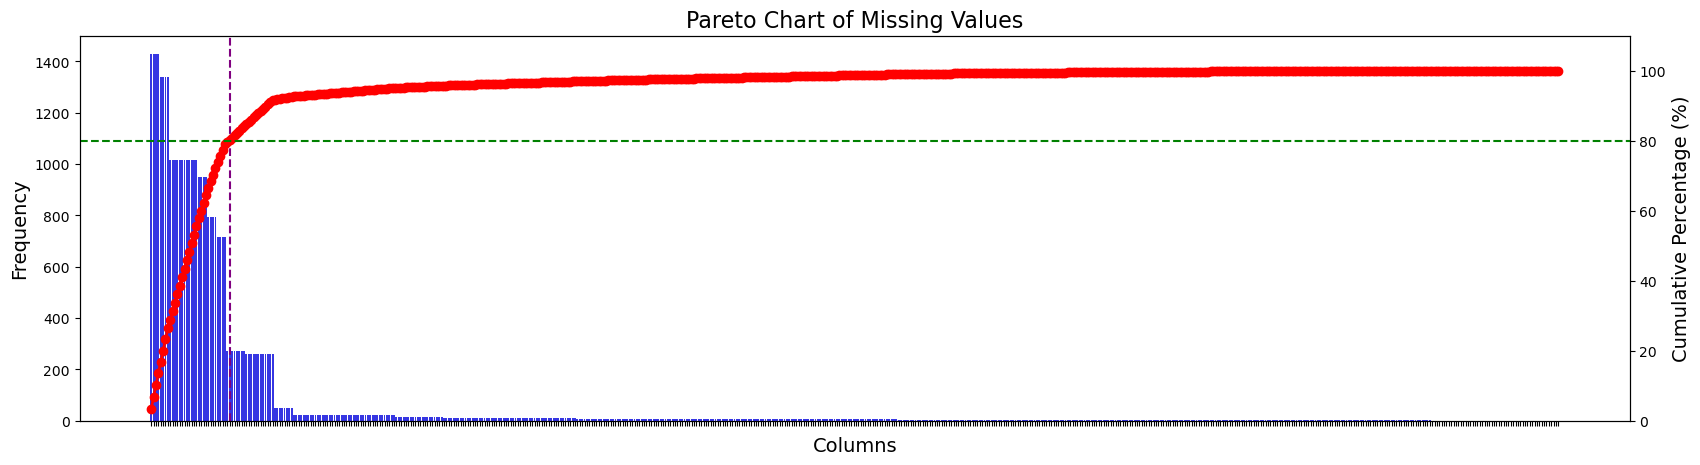

In [16]:
#Pareto Chart of Missing Values as a Count of Values
# # Calculate missing value counts and sort them in descending order
missing_counts = df.isna().sum().sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = missing_counts.cumsum() / missing_counts.sum() * 100

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the bar chart for missing value counts
sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, ax=ax1, color='blue')
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
ax1.set_title('Pareto Chart of Missing Values', fontsize=16)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(missing_counts.index, cumulative_percentage, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Ensure the percentage scale goes slightly above 100 for clarity

# Rotate x-axis labels for better readability
ax1.set_xticklabels([])

# Add horizontal line at 80% cumulative percentage
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5)

# Find the column where the cumulative percentage exceeds 80%
threshold_index = cumulative_percentage[cumulative_percentage > 80].index[0]

# Add vertical line at the threshold column
ax1.axvline(x=threshold_index, color='purple', linestyle='--', linewidth=1.5)

plt.show()

In [17]:
# Combine missing counts and cumulative percentage into a DataFrame for better readability
missing_pct=missing_counts.values / df.shape[0] * 100
pareto_data = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing %': missing_pct,
    'Cumulative Percentage': cumulative_percentage.values
})

# Remove any limit on number of displayed rows and columns
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
# Now display the full DataFrame
pareto_data

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
...,...,...,...
587,col121,0.000000,100.000000
588,col157,0.000000,100.000000
589,col496,0.000000,100.000000
590,col495,0.000000,100.000000


In [18]:
pareto_data.head(30)

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
5,col359,85.577537,20.018593
6,col86,85.577537,23.215180
7,col221,85.577537,26.411766
8,col247,64.964901,28.838407
9,col110,64.964901,31.265047


In [19]:
pareto_data

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
...,...,...,...
587,col121,0.000000,100.000000
588,col157,0.000000,100.000000
589,col496,0.000000,100.000000
590,col495,0.000000,100.000000


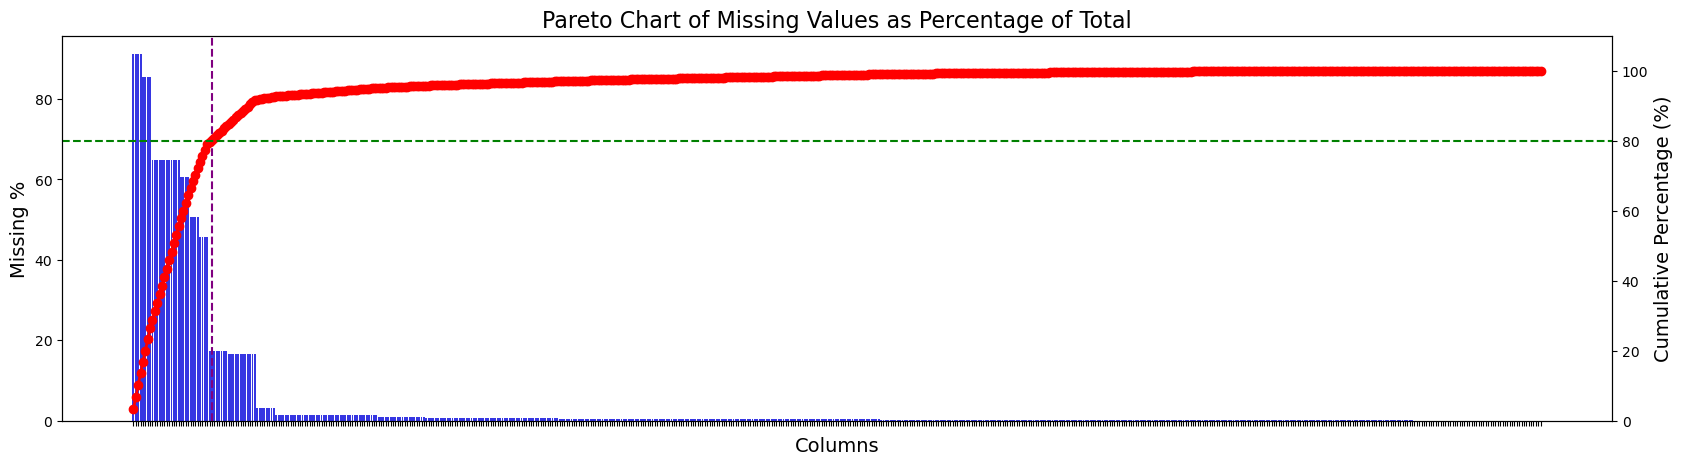

In [20]:
#Pareto Chart of Missing Values as a % of Total - USED IN PRESENTATION
# # Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the bar chart for missing percentages
sns.barplot(x=pareto_data['Column'], y=pareto_data['Missing %'], alpha=0.9, ax=ax1, color='blue')
ax1.set_ylabel('Missing %', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
ax1.set_title('Pareto Chart of Missing Values as Percentage of Total', fontsize=16)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto_data['Column'], pareto_data['Cumulative Percentage'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Ensure the percentage scale goes slightly above 100 for clarity

# Rotate x-axis labels for better readability
ax1.set_xticklabels([])

# Add horizontal line at 80% cumulative percentage
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5)

# Find the column where the cumulative percentage exceeds 80%
threshold_column = pareto_data.loc[pareto_data['Cumulative Percentage'] > 80, 'Column'].iloc[0]

# Add vertical line at the threshold column
threshold_index = pareto_data[pareto_data['Column'] == threshold_column].index[0]
ax1.axvline(x=threshold_index, color='purple', linestyle='--', linewidth=1.5)

plt.show()

In [21]:
# Sort the DataFrame by 'Cumulative Percentage' in descending order
sorted_pareto_data = pareto_data.sort_values(by='Cumulative Percentage', ascending=False)

# Print the 'Missing %' and 'Cumulative Percentage' columns
print(sorted_pareto_data[['Missing %', 'Cumulative Percentage']])

     Missing %  Cumulative Percentage
591   0.000000             100.000000
564   0.000000             100.000000
562   0.000000             100.000000
561   0.000000             100.000000
560   0.000000             100.000000
..         ...                    ...
4    85.577537              16.822007
3    91.193363              13.625420
2    91.193363              10.219065
1    91.193363               6.812710
0    91.193363               3.406355

[592 rows x 2 columns]


Duplicate Row Treatment - Remove 0 Features

In [22]:
#Check for duplicate rows (there are 0)
df.duplicated().sum()

0

Zero Variance Treatment - No Action

In [23]:
#Zero volatility columns are those with 0 or near 0 mean and std
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
col2,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
col3,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
col4,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
col5,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
col587,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
col588,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
col589,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
col590,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


Low Variability Investigation - No Action

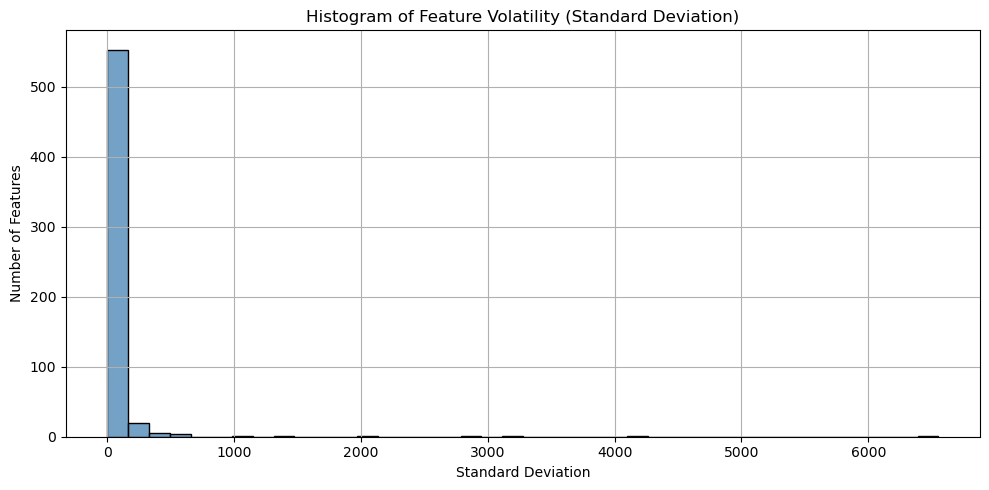

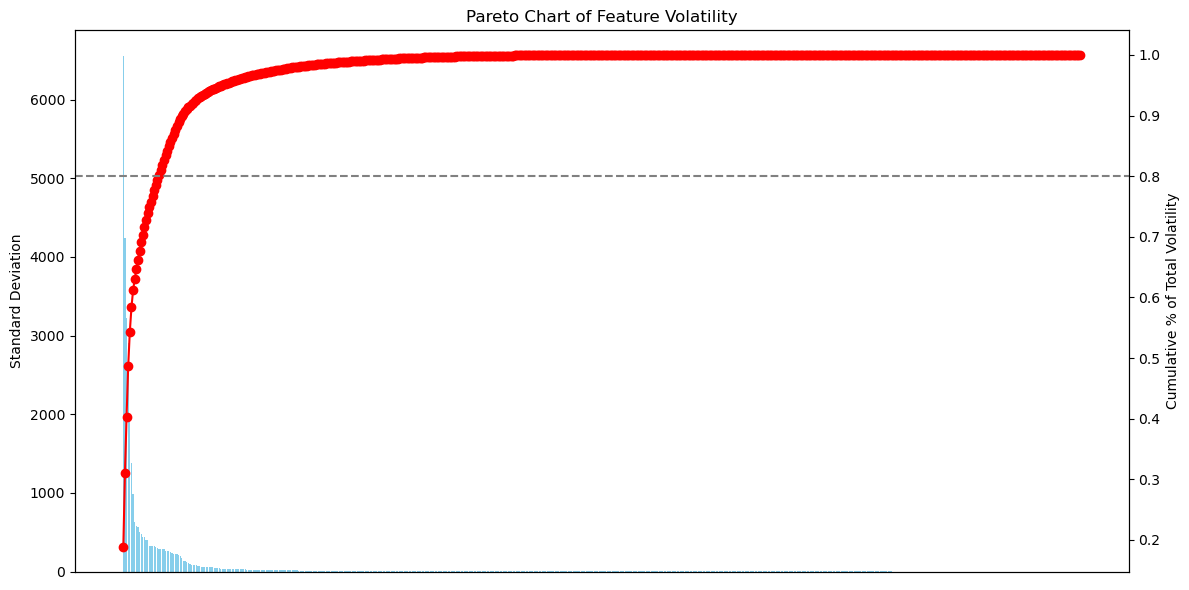

Number of features with low (but non-zero) volatility: 55
Percentage of features with low (but non-zero) volatility: 9.32%


In [24]:
# Calculate standard deviation (volatility) for each sensor column
std_devs = data.std().sort_values()

# ----------- Histogram of Feature Volatility -----------
plt.figure(figsize=(10, 5))
sns.histplot(std_devs, bins=40, kde=False, color='steelblue')
plt.title("Histogram of Feature Volatility (Standard Deviation)")
plt.xlabel("Standard Deviation")
plt.ylabel("Number of Features")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- Pareto Chart of Feature Volatility -----------
# Sort in descending order for Pareto
sorted_std = std_devs[::-1]
cumulative = sorted_std.cumsum() / sorted_std.sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (standard deviation per column)
ax1.bar(sorted_std.index, sorted_std.values, color='skyblue')
ax1.set_ylabel('Standard Deviation')
ax1.set_xticks([])
ax1.set_title('Pareto Chart of Feature Volatility')

# Cumulative line plot
ax2 = ax1.twinx()
ax2.plot(cumulative.values, color='red', marker='o')
ax2.axhline(0.8, color='gray', linestyle='dashed')  # 80% line
ax2.set_ylabel('Cumulative % of Total Volatility')
plt.tight_layout()
plt.show()

# calculate low volatility features

# Calculate standard deviation excluding 'status' and 'timestamp'
std_devs = df.drop(columns=['status', 'timestamp']).std()
# Define a threshold for low volatility
low_volatility_threshold = 0.01

# Number of features with low but non-zero volatility
low_volatility_features = (std_devs > 0) & (std_devs < low_volatility_threshold)

# Calculate counts and percentages
num_low_volatility = low_volatility_features.sum()
percent_low_volatility = (num_low_volatility / len(std_devs)) * 100

print(f"Number of features with low (but non-zero) volatility: {num_low_volatility}")
print(f"Percentage of features with low (but non-zero) volatility: {percent_low_volatility:.2f}%")


Outlier Investigation - No Action


In [25]:
#note that the total outliers differs from ppt 1 because pp1 only removed zero volatility columns before calculating outliers; this version removes zero volatility AND >65% missing values. 
df_cleaned = data.copy()
# Calculate Z-scores
z_scores = (df_cleaned - df_cleaned.mean()) / df_cleaned.std()

# Define thresholds
thresholds = [3, 4]

for threshold in thresholds:
    # Identify outliers: where |Z| > threshold
    outliers = np.abs(z_scores) > threshold

    # Total outliers per row and count of rows with any outliers
    outliers_per_row = outliers.sum(axis=1)
    total_outlier_rows = (outliers_per_row > 0).sum()

    # Total outliers per column and count of columns with any outliers
    outliers_per_col = outliers.sum(axis=0)
    total_outlier_cols = (outliers_per_col > 0).sum()

    # Total outlier values in the dataset
    total_outliers = outliers.sum().sum()
    total_values = df_cleaned.size
    percent_outliers = (total_outliers / total_values) * 100

    # Print results
    print(f"\n--- Z-score threshold > {threshold} ---")
    print(f"Total rows with outliers: {total_outlier_rows} out of {df_cleaned.shape[0]} rows")
    print(f"Total columns with outliers: {total_outlier_cols} out of {df_cleaned.shape[1]} columns")
    print(f"Total outlier values: {total_outliers} out of {total_values} ({percent_outliers:.2f}%)")



--- Z-score threshold > 3 ---
Total rows with outliers: 1265 out of 1567 rows
Total columns with outliers: 440 out of 590 columns
Total outlier values: 6116 out of 924530 (0.66%)

--- Z-score threshold > 4 ---
Total rows with outliers: 762 out of 1567 rows
Total columns with outliers: 402 out of 590 columns
Total outlier values: 3258 out of 924530 (0.35%)


Correlation Investigation - No Action

In [26]:
#calculate standard deviation of column subsamples
print(f"Col1 Std: {data['col1'].std()}")
print(f"Col102 Std: {data['col102'].std()}")
print(f"Col64 Std: {data['col64'].std()}")

Col1 Std: 73.62178674853081
Col102 Std: 0.00022076237351255305
Col64 Std: 7.1198631082108985


In [27]:
data.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,col58

Text(0.5, 1.0, 'Single Digit SD Feature - Example 2 (col64)')

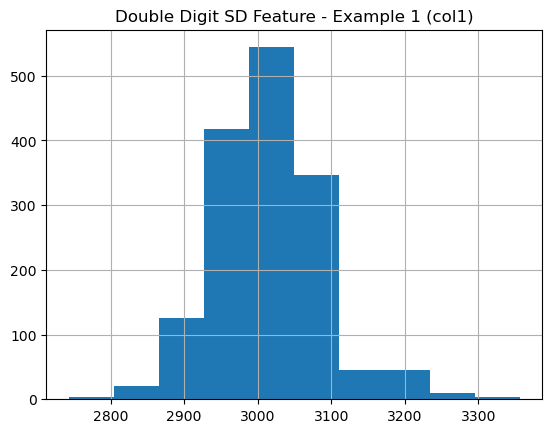

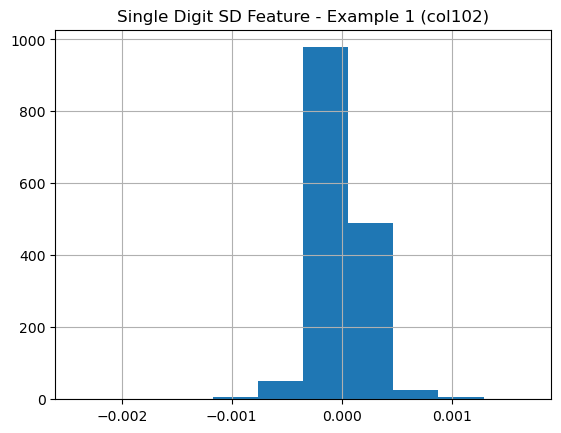

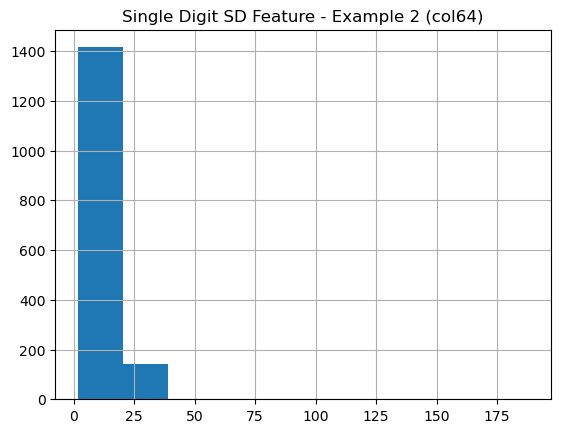

In [28]:
#Analyze histograms of a subsample of single digit SD vs double digit SD features to see if they are normally distributed
#double digit SD feature example
data[['col1']].hist()
plt.title('Double Digit SD Feature - Example 1 (col1)')

#single digit SD feature examples
data[['col102']].hist()
plt.title('Single Digit SD Feature - Example 1 (col102)')

data[['col64']].hist()
plt.title('Single Digit SD Feature - Example 2 (col64)')

['col163', 'col162', 'col298', 'col25', 'col297', 'col24', 'col160', 'col22', 'col161', 'col205', 'col141', 'col295']


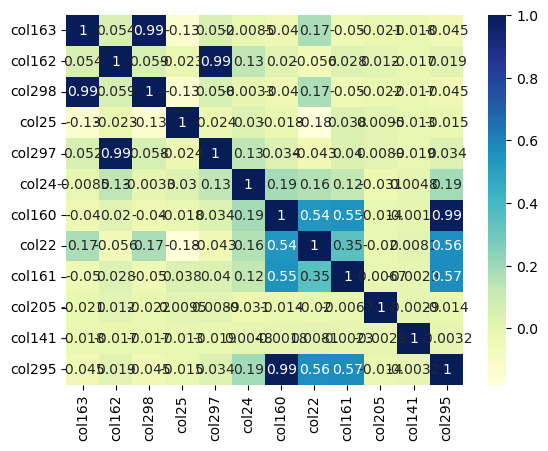

In [29]:
# Print the 12 columns with the highest standard deviation
top_12_std_cols = data.std().sort_values(ascending=False).head(12)
print(top_12_std_cols.index.tolist())

# Compute correlation matrix
corr_matrix_12= data[top_12_std_cols.index.tolist()].corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix_12, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

['col4', 'col226', 'col159', 'col91', 'col512', 'col420', 'col500', 'col501', 'col68', 'col23']


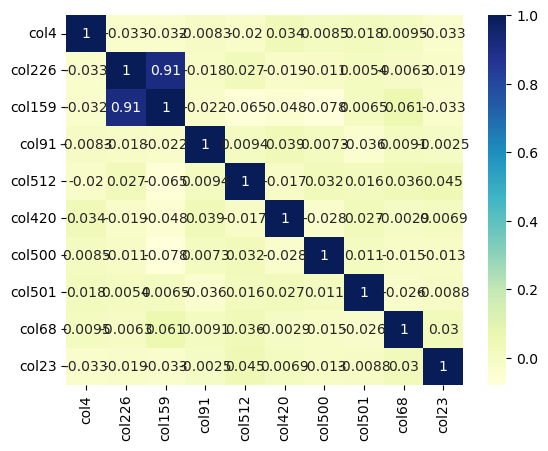

In [30]:
#print top standard deviation columns #12-22
std_sorted = data.std().sort_values(ascending=False)
top_12_22_std_cols = std_sorted.index[12:22].tolist()
print(top_12_22_std_cols)

# Plot correlation heatmap
corr_matrix_12_22 = data[top_12_22_std_cols].corr()
sns.heatmap(corr_matrix_12_22, cmap="YlGnBu", annot=True)
plt.show()

Lowest 10 double digit standard deviation columns:
col247    10.045084
col472    10.174117
col478    10.185026
col570    10.213294
col198    10.552162
col429    10.632730
col517    10.783880
col206    11.541083
col67     11.623078
col47     12.170315
dtype: float64


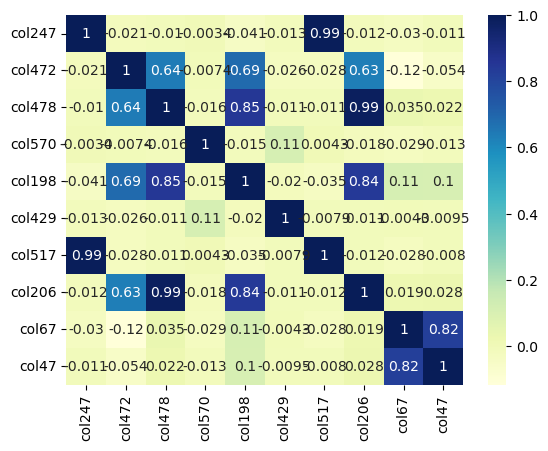

In [31]:
# Print the lowest 10 double digit standard deviation columns
# Find columns with double digit standard deviation (>=10 and <100)
double_digit_std = std_sorted[(std_sorted >= 10) & (std_sorted < 100)]
lowest_10_double_digit_std = double_digit_std[(double_digit_std >= 10) & (double_digit_std < 100)].sort_values().head(10)
print("Lowest 10 double digit standard deviation columns:")
print(lowest_10_double_digit_std)

#plot correlation heatmap of lowest 10 double digit standard deviation columns
corr_matrix_lowest_10_double_digit = data[lowest_10_double_digit_std.index].corr()
sns.heatmap(corr_matrix_lowest_10_double_digit, cmap="YlGnBu", annot=True)
plt.show()

Execute Train/Test Split

In [33]:
from sklearn.model_selection import StratifiedKFold

target_col = "status"

# --- FEATURE / TARGET SEPARATION -----------------------------
if target_col in data.columns:
    # Case A: data still has the label column
    y = data[target_col].copy()
    X = data.drop(columns=target_col).copy()
else:
    # Case B: data is already features-only; labels live elsewhere
    y = labels[target_col].copy()
    X = data.copy()

# Guard-rail
assert target_col not in X.columns, f"{target_col} leaked into X!"

# --- STRATIFIED SPLIT ----------------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_indices = list(skf.split(X, y))

print("Stratified 5-Fold CV splits:")
for fold_idx, (train_idx, val_idx) in enumerate(fold_indices, 1):
    X_train_fold = X.iloc[train_idx]
    X_val_fold   = X.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    y_val_fold   = y.iloc[val_idx]

    print(f"\nFold {fold_idx}:")
    print(f"  Training shape : {X_train_fold.shape}")
    print(f"  Validation shape : {X_val_fold.shape}")
    print(f"  Training class counts :\n{y_train_fold.value_counts()}")
    print(f"  Validation class counts :\n{y_val_fold.value_counts()}")


Stratified 5-Fold CV splits:

Fold 1:
  Training shape : (1253, 590)
  Validation shape : (314, 590)
  Training class counts :
status
-1    1170
 1      83
Name: count, dtype: int64
  Validation class counts :
status
-1    293
 1     21
Name: count, dtype: int64

Fold 2:
  Training shape : (1253, 590)
  Validation shape : (314, 590)
  Training class counts :
status
-1    1170
 1      83
Name: count, dtype: int64
  Validation class counts :
status
-1    293
 1     21
Name: count, dtype: int64

Fold 3:
  Training shape : (1254, 590)
  Validation shape : (313, 590)
  Training class counts :
status
-1    1170
 1      84
Name: count, dtype: int64
  Validation class counts :
status
-1    293
 1     20
Name: count, dtype: int64

Fold 4:
  Training shape : (1254, 590)
  Validation shape : (313, 590)
  Training class counts :
status
-1    1171
 1      83
Name: count, dtype: int64
  Validation class counts :
status
-1    292
 1     21
Name: count, dtype: int64

Fold 5:
  Training shape : (1254, 

Describe Train/Test Split Distributions

In [34]:
total_missing_values

41951

Zero Variance Removal

In [35]:
from sklearn.feature_selection import VarianceThreshold

# Store the filtered data for each fold
fold_data = {}

# For each fold
for fold_idx, (train_idx, val_idx) in enumerate(fold_indices, 1):
    # Split the data
    X_train = X.iloc[train_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val = y.iloc[val_idx]
    
    # Create variance threshold selector
    selector = VarianceThreshold(threshold=0)
    
    # Fit ONLY on training data
    selector.fit(X_train)
    
    # Get selected feature names
    selected_features = X.columns[selector.get_support()]
    
    # Transform and convert back to DataFrames
    X_train_selected = pd.DataFrame(
        selector.transform(X_train),
        columns=selected_features,
        index=X_train.index
    )
    X_val_selected = pd.DataFrame(
        selector.transform(X_val),
        columns=selected_features,
        index=X_val.index
    )
    
    # Store for next step
    fold_data[fold_idx] = {
        'X_train': X_train_selected,
        'X_val': X_val_selected,
        'y_train': y_train,
        'y_val': y_val
    }
    
    print(f"Fold {fold_idx}: {len(selected_features)} features kept out of {X.shape[1]}")

Fold 1: 468 features kept out of 590
Fold 2: 474 features kept out of 590
Fold 3: 474 features kept out of 590
Fold 4: 474 features kept out of 590
Fold 5: 474 features kept out of 590


Missing Values


In [36]:
# Define threshold
missing_threshold = 0.6

# Store the final cleaned data
fold_data_final = {}

# For each fold, remove columns with >60% missing values
for fold_idx in range(1, 6):
    # Get the variance-filtered data from previous step
    X_train = fold_data[fold_idx]['X_train']
    X_val = fold_data[fold_idx]['X_val']
    y_train = fold_data[fold_idx]['y_train']
    y_val = fold_data[fold_idx]['y_val']
    
    # Calculate missing percentage ONLY on training data
    missing_pct = X_train.isnull().sum() / len(X_train)
    
    # Identify columns to keep (those with <= 60% missing)
    cols_to_keep = missing_pct[missing_pct <= missing_threshold].index
    
    # Apply to both train and validation
    X_train_final = X_train[cols_to_keep]
    X_val_final = X_val[cols_to_keep]
    
    # Store final cleaned data
    fold_data_final[fold_idx] = {
        'X_train': X_train_final,
        'X_val': X_val_final,
        'y_train': y_train,
        'y_val': y_val
    }
    
    print(f"Fold {fold_idx}: {len(cols_to_keep)} columns kept out of {X_train.shape[1]}")
    print(f"Removed {X_train.shape[1] - len(cols_to_keep)} columns with >60% missing values")

Fold 1: 444 columns kept out of 468
Removed 24 columns with >60% missing values
Fold 2: 450 columns kept out of 474
Removed 24 columns with >60% missing values
Fold 3: 450 columns kept out of 474
Removed 24 columns with >60% missing values
Fold 4: 450 columns kept out of 474
Removed 24 columns with >60% missing values
Fold 5: 450 columns kept out of 474
Removed 24 columns with >60% missing values


Scale Train Folds

In [37]:
from sklearn.preprocessing import RobustScaler

# Store the scaled data
robust_fold_data_final = {}

# For each fold
for fold_idx in range(1, 6):
    # Get the cleaned data from previous step
    X_train = fold_data_final[fold_idx]['X_train']
    X_val = fold_data_final[fold_idx]['X_val']
    y_train = fold_data_final[fold_idx]['y_train']
    y_val = fold_data_final[fold_idx]['y_val']
    
    # Create RobustScaler
    scaler = RobustScaler()
    
    # CRITICAL: Fit ONLY on training data
    scaler.fit(X_train)
    
    # Transform both sets using the training statistics
    X_train_scaled = pd.DataFrame(
        scaler.transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_val_scaled = pd.DataFrame(
        scaler.transform(X_val),  # Only transform, don't fit!
        columns=X_val.columns,
        index=X_val.index
    )
    
    # Store scaled data
    robust_fold_data_final[fold_idx] = {
        'X_train': X_train_scaled,
        'X_val': X_val_scaled,
        'y_train': y_train,
        'y_val': y_val,
        'scaler': scaler  # Store scaler in case you need it later
    }
    
    print(f"Fold {fold_idx}: Scaled {X_train.shape[1]} features")
    print(f"  Training shape: {X_train_scaled.shape}")
    print(f"  Validation shape: {X_val_scaled.shape}")

Fold 1: Scaled 444 features
  Training shape: (1253, 444)
  Validation shape: (314, 444)
Fold 2: Scaled 450 features
  Training shape: (1253, 450)
  Validation shape: (314, 450)
Fold 3: Scaled 450 features
  Training shape: (1254, 450)
  Validation shape: (313, 450)
Fold 4: Scaled 450 features
  Training shape: (1254, 450)
  Validation shape: (313, 450)
Fold 5: Scaled 450 features
  Training shape: (1254, 450)
  Validation shape: (313, 450)


Impute Missing Values & Confirm Imputation Method

In [38]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler

# Store imputed data for each method
mean_imputed_data = {}
knn_imputed_data = {}
mice_imputed_data = {}

for fold_idx in range(1, 6):
    # Get UNSCALED data for mean imputation
    X_train_unscaled = fold_data_final[fold_idx]['X_train']
    X_val_unscaled = fold_data_final[fold_idx]['X_val']
    
    # Get SCALED data for KNN and MICE
    X_train_scaled = robust_fold_data_final[fold_idx]['X_train']
    X_val_scaled = robust_fold_data_final[fold_idx]['X_val']
    
    y_train = fold_data_final[fold_idx]['y_train']
    y_val = fold_data_final[fold_idx]['y_val']
    
    print(f"\nFold {fold_idx}:")
    
    # 1. Mean Imputation (on UNSCALED data)
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputer.fit(X_train_unscaled)  # Fit on unscaled training
    
    X_train_mean = pd.DataFrame(
        mean_imputer.transform(X_train_unscaled),
        columns=X_train_unscaled.columns,
        index=X_train_unscaled.index
    )
    X_val_mean = pd.DataFrame(
        mean_imputer.transform(X_val_unscaled),
        columns=X_val_unscaled.columns,
        index=X_val_unscaled.index
    )
    
    # Now scale the mean-imputed data
    scaler = RobustScaler()
    scaler.fit(X_train_mean)
    
    X_train_mean_scaled = pd.DataFrame(
        scaler.transform(X_train_mean),
        columns=X_train_mean.columns,
        index=X_train_mean.index
    )
    X_val_mean_scaled = pd.DataFrame(
        scaler.transform(X_val_mean),
        columns=X_val_mean.columns,
        index=X_val_mean.index
    )
    
    mean_imputed_data[fold_idx] = {
        'X_train': X_train_mean_scaled,
        'X_val': X_val_mean_scaled,
        'y_train': y_train,
        'y_val': y_val
    }
    
    # 2. KNN Imputation (on SCALED data)
    knn_imputer = KNNImputer(n_neighbors=5)
    knn_imputer.fit(X_train_scaled)  # Fit on scaled training
    
    X_train_knn = pd.DataFrame(
        knn_imputer.transform(X_train_scaled),
        columns=X_train_scaled.columns,
        index=X_train_scaled.index
    )
    X_val_knn = pd.DataFrame(
        knn_imputer.transform(X_val_scaled),
        columns=X_val_scaled.columns,
        index=X_val_scaled.index
    )
    
    knn_imputed_data[fold_idx] = {
        'X_train': X_train_knn,
        'X_val': X_val_knn,
        'y_train': y_train,
        'y_val': y_val
    }
    
    # 3. MICE Imputation (on SCALED data)
    mice_imputer = IterativeImputer(random_state=42, max_iter=10)
    mice_imputer.fit(X_train_scaled)  # Fit on scaled training
    
    X_train_mice = pd.DataFrame(
        mice_imputer.transform(X_train_scaled),
        columns=X_train_scaled.columns,
        index=X_train_scaled.index
    )
    X_val_mice = pd.DataFrame(
        mice_imputer.transform(X_val_scaled),
        columns=X_val_scaled.columns,
        index=X_val_scaled.index
    )
    
    mice_imputed_data[fold_idx] = {
        'X_train': X_train_mice,
        'X_val': X_val_mice,
        'y_train': y_train,
        'y_val': y_val
    }
    
    print(f"Imputation completed: Mean (unscaled→scaled), KNN (scaled), MICE (scaled)")


Fold 1:
Imputation completed: Mean (unscaled→scaled), KNN (scaled), MICE (scaled)

Fold 2:
Imputation completed: Mean (unscaled→scaled), KNN (scaled), MICE (scaled)

Fold 3:
Imputation completed: Mean (unscaled→scaled), KNN (scaled), MICE (scaled)

Fold 4:
Imputation completed: Mean (unscaled→scaled), KNN (scaled), MICE (scaled)

Fold 5:
Imputation completed: Mean (unscaled→scaled), KNN (scaled), MICE (scaled)



Fold 1 - Average Variance per Column:
  Original (with NaN): 131903.1823
  Mean Imputation: 126982.7851
  KNN Imputation: 131762.1238
  MICE Imputation: 131435.7209

Fold 2 - Average Variance per Column:
  Original (with NaN): 265950.5208
  Mean Imputation: 262029.7241
  KNN Imputation: 266210.9965
  MICE Imputation: 264834.3860

Fold 3 - Average Variance per Column:
  Original (with NaN): 233788.2672
  Mean Imputation: 226337.7997
  KNN Imputation: 235699.0056
  MICE Imputation: 232831.9895

Fold 4 - Average Variance per Column:
  Original (with NaN): 256450.1797
  Mean Imputation: 250033.9400
  KNN Imputation: 258096.7967
  MICE Imputation: 255327.2621

Fold 5 - Average Variance per Column:
  Original (with NaN): 210764.0276
  Mean Imputation: 208571.8863
  KNN Imputation: 211190.6709
  MICE Imputation: 209852.0837


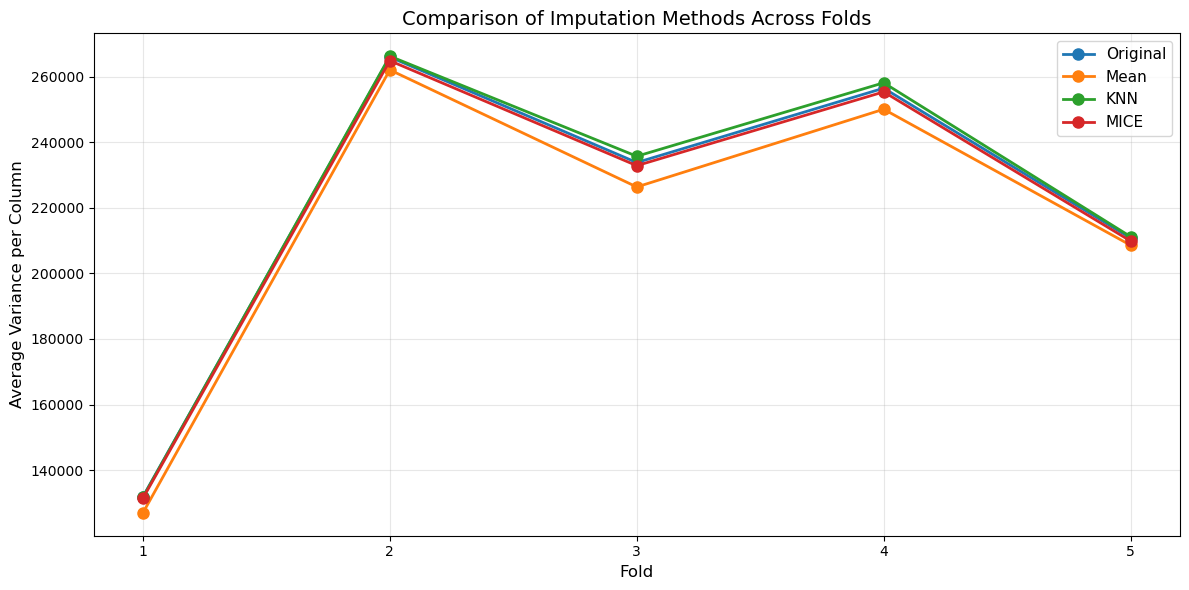


Summary Statistics Across Folds (Average Variance per Column):

Original Imputation:
  Mean: 219771.2355
  Std: 47908.8156
  Min: 131903.1823
  Max: 265950.5208
  Range: 134047.3385

Mean Imputation:
  Mean: 214791.2270
  Std: 47656.7948
  Min: 126982.7851
  Max: 262029.7241
  Range: 135046.9390

KNN Imputation:
  Mean: 220591.9187
  Std: 48363.3252
  Min: 131762.1238
  Max: 266210.9965
  Range: 134448.8728

MICE Imputation:
  Mean: 218856.2884
  Std: 47671.5196
  Min: 131435.7209
  Max: 264834.3860
  Range: 133398.6651


/var/folders/c7/47_sd8tn00398pc3xmjbblh80000gn/T/ipykernel_26281/2576750048.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_for_boxplot, labels=['Original', 'Mean', 'KNN', 'MICE'], patch_artist=True)


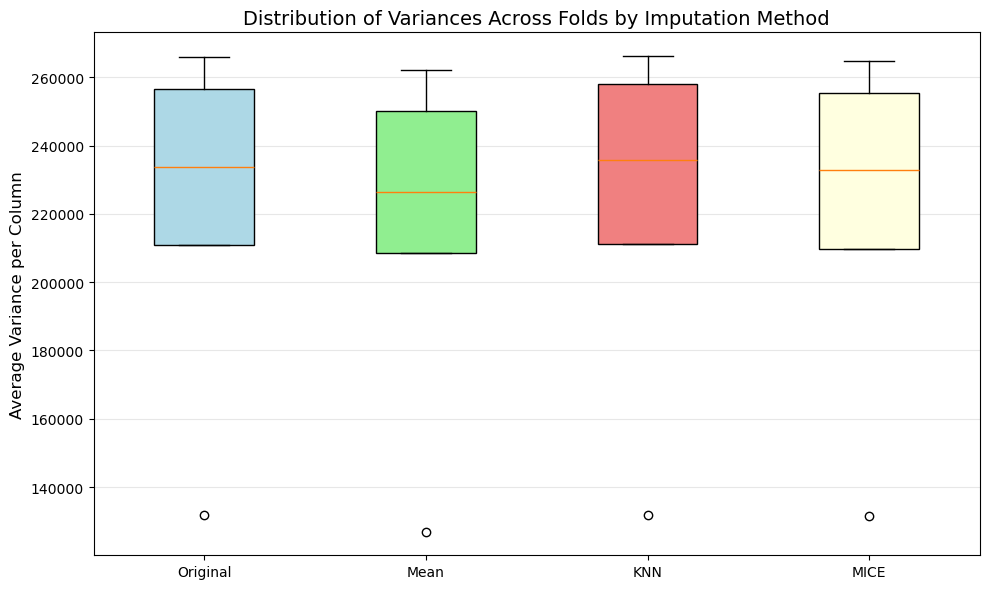


Percentage Change in Variance from Original:

Mean Imputation:
  Average % change: -2.39%
  Std of % change: 1.01%

KNN Imputation:
  Average % change: 0.33%
  Std of % change: 0.35%

MICE Imputation:
  Average % change: -0.41%
  Std of % change: 0.03%


<Figure size 1000x600 with 0 Axes>

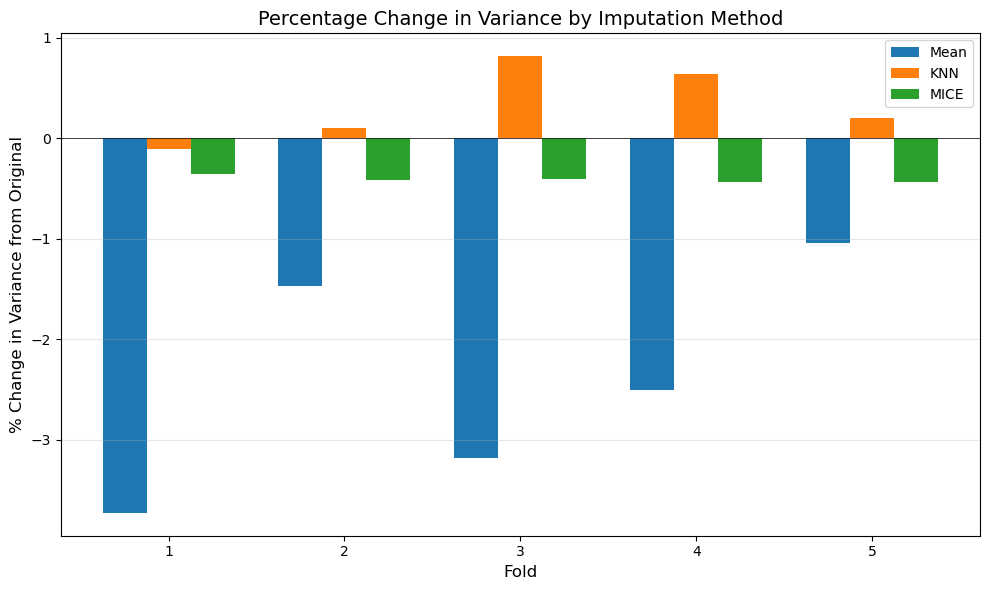

In [39]:
# Calculate variances for each method and fold
fold_variances = {
    'Original': [],
    'Mean': [],
    'KNN': [],
    'MICE': []
}

# Calculate variances for each fold
for fold_idx in range(1, 6):
    # Original variance (from scaled data before imputation)
    X_train_scaled = robust_fold_data_final[fold_idx]['X_train']
    original_var = X_train_scaled.var().mean()
    fold_variances['Original'].append(original_var)
    
    # Mean imputation variance
    X_train_mean = mean_imputed_data[fold_idx]['X_train']
    mean_var = X_train_mean.var().mean()
    fold_variances['Mean'].append(mean_var)
    
    # KNN imputation variance
    X_train_knn = knn_imputed_data[fold_idx]['X_train']
    knn_var = X_train_knn.var().mean()
    fold_variances['KNN'].append(knn_var)
    
    # MICE imputation variance
    X_train_mice = mice_imputed_data[fold_idx]['X_train']
    mice_var = X_train_mice.var().mean()
    fold_variances['MICE'].append(mice_var)
    
    print(f"\nFold {fold_idx} - Average Variance per Column:")
    print(f"  Original (with NaN): {original_var:.4f}")
    print(f"  Mean Imputation: {mean_var:.4f}")
    print(f"  KNN Imputation: {knn_var:.4f}")
    print(f"  MICE Imputation: {mice_var:.4f}")

# Visualize variance comparisons across folds
plt.figure(figsize=(12, 6))
folds = range(1, 6)

for method, variances in fold_variances.items():
    plt.plot(folds, variances, marker='o', label=method, linewidth=2, markersize=8)

plt.xlabel('Fold', fontsize=12)
plt.ylabel('Average Variance per Column', fontsize=12)
plt.title('Comparison of Imputation Methods Across Folds', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(folds)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("Summary Statistics Across Folds (Average Variance per Column):")
print("="*60)

for method, variances in fold_variances.items():
    print(f"\n{method} Imputation:")
    print(f"  Mean: {np.mean(variances):.4f}")
    print(f"  Std: {np.std(variances):.4f}")
    print(f"  Min: {np.min(variances):.4f}")
    print(f"  Max: {np.max(variances):.4f}")
    print(f"  Range: {np.max(variances) - np.min(variances):.4f}")

# Additional visualization: Box plot comparison
plt.figure(figsize=(10, 6))
data_for_boxplot = [fold_variances[method] for method in ['Original', 'Mean', 'KNN', 'MICE']]
box_plot = plt.boxplot(data_for_boxplot, labels=['Original', 'Mean', 'KNN', 'MICE'], patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Average Variance per Column', fontsize=12)
plt.title('Distribution of Variances Across Folds by Imputation Method', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate percentage change from original
print("\n" + "="*60)
print("Percentage Change in Variance from Original:")
print("="*60)

for method in ['Mean', 'KNN', 'MICE']:
    pct_changes = []
    for fold_idx in range(5):
        original = fold_variances['Original'][fold_idx]
        imputed = fold_variances[method][fold_idx]
        pct_change = ((imputed - original) / original) * 100
        pct_changes.append(pct_change)
    
    print(f"\n{method} Imputation:")
    print(f"  Average % change: {np.mean(pct_changes):.2f}%")
    print(f"  Std of % change: {np.std(pct_changes):.2f}%")
    
# Visualize percentage changes
plt.figure(figsize=(10, 6))
x = np.arange(1, 6)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, method in enumerate(['Mean', 'KNN', 'MICE']):
    pct_changes = []
    for fold_idx in range(5):
        original = fold_variances['Original'][fold_idx]
        imputed = fold_variances[method][fold_idx]
        pct_change = ((imputed - original) / original) * 100
        pct_changes.append(pct_change)
    
    ax.bar(x + i*width - width, pct_changes, width, label=method)

ax.set_xlabel('Fold', fontsize=12)
ax.set_ylabel('% Change in Variance from Original', fontsize=12)
ax.set_title('Percentage Change in Variance by Imputation Method', fontsize=14)
ax.set_xticks(x)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

Confirm PCA Should Not Be Applied

Execute Feature Selection - Boruta & Re-Check Any Correlated Values Remaining

Balancing Using SMOTE and Random Forest Execution

In [40]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Store the feature-selected data
knn_boruta_selected_data = {}

for fold_idx in range(1, 6):
    print(f"\nFold {fold_idx} - Boruta Feature Selection:")
    
    # Get KNN imputed data
    X_train = knn_imputed_data[fold_idx]['X_train']
    X_val = knn_imputed_data[fold_idx]['X_val']
    y_train = knn_imputed_data[fold_idx]['y_train']
    y_val = knn_imputed_data[fold_idx]['y_val']
    
    print(f"Starting with {X_train.shape[1]} features")
    
    # Initialize Boruta
    rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)
    boruta = BorutaPy(
        rf, 
        n_estimators='auto',
        verbose=2,
        random_state=42,
        max_iter=100  # Adjust based on your needs
    )
    
    # Fit ONLY on training data
    boruta.fit(X_train.values, y_train.values)
    
    # Get selected features
    selected_features = X_train.columns[boruta.support_].tolist()
    
    # Apply selection to both train and validation
    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]
    
    # Store results
    knn_boruta_selected_data[fold_idx] = {
        'X_train': X_train_selected,
        'X_val': X_val_selected,
        'y_train': y_train,
        'y_val': y_val,
        'selected_features': selected_features,
        'boruta_selector': boruta
    }
    
    print(f"Selected {len(selected_features)} features")
    print(f"Rejected {sum(boruta.support_ == False)} features")
    print(f"Tentative {sum(boruta.support_weak_)} features")


Fold 1 - Boruta Feature Selection:
Starting with 444 features
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	432
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	10
Rejected: 	432
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	10
Rejected: 	432
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	10
Rejected: 	432
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	432
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	432
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	432
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 

BORUTA FEATURE SELECTION SUMMARY

1. Total unique features SELECTED across all folds: 34

2. Total unique features TENTATIVE across all folds: 23

3. Features selected in ALL 5 folds: 6

4. Features selected in 4 folds: 2

5. Features selected in 3 folds: 3

6. Features selected in ONLY 1 fold: 18


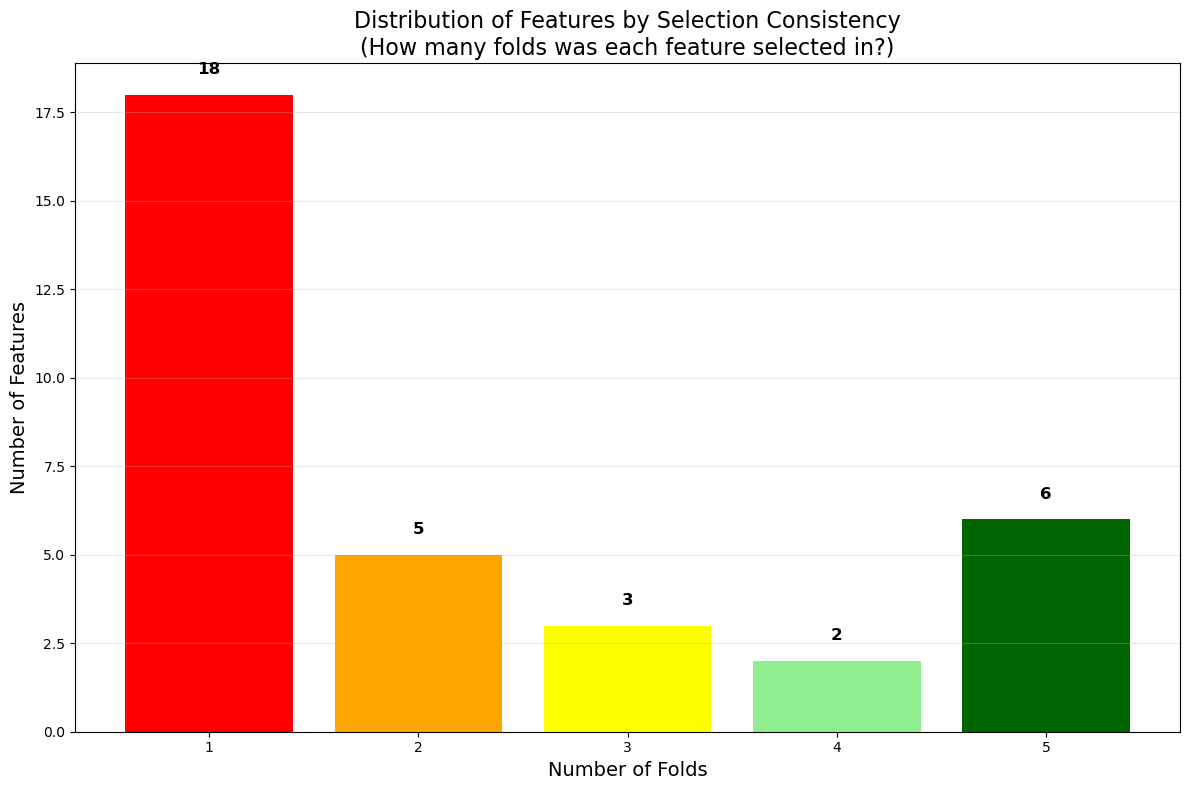


DETAILED BREAKDOWN

--- Features selected in ALL 5 folds (showing first 10) ---
  1. col104
  2. col131
  3. col248
  4. col34
  5. col520
  6. col60

--- Features selected in 4 folds (showing first 10) ---
  1. col478 (tentative in 1 fold(s))
  2. col511 (tentative in 0 fold(s))

--- Features selected in ONLY 1 fold (showing first 10) ---
  1. col103 (tentative in 0 fold(s))
  2. col113 (tentative in 1 fold(s))
  3. col122 (tentative in 0 fold(s))
  4. col125 (tentative in 1 fold(s))
  5. col127 (tentative in 1 fold(s))
  6. col134 (tentative in 0 fold(s))
  7. col153 (tentative in 2 fold(s))
  8. col20 (tentative in 1 fold(s))
  9. col29 (tentative in 1 fold(s))
  10. col291 (tentative in 0 fold(s))
  ... and 8 more


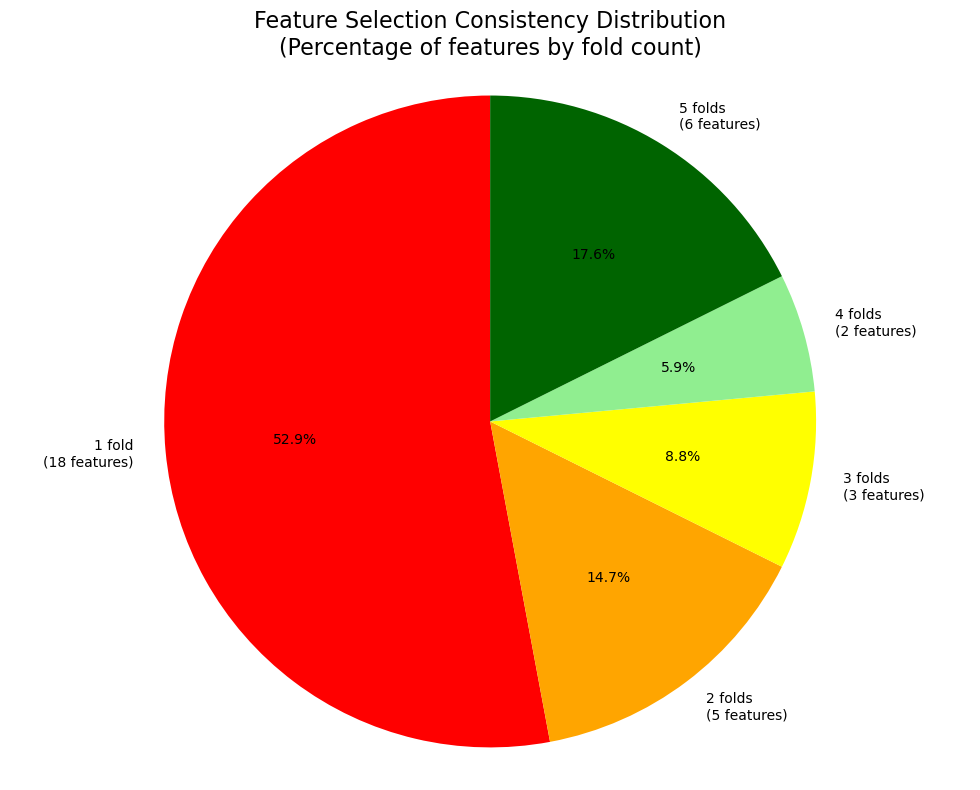


SUMMARY STATISTICS
Total unique features selected: 34
Highly stable features (5 folds): 6 (17.6%)
Stable features (4-5 folds): 8 (23.5%)
Unstable features (1-2 folds): 23 (67.6%)

SELECTED vs TENTATIVE OVERLAP
Features that were ONLY selected (never tentative): 23
Features that were ONLY tentative (never selected): 12
Features that were BOTH selected and tentative (in different folds): 11


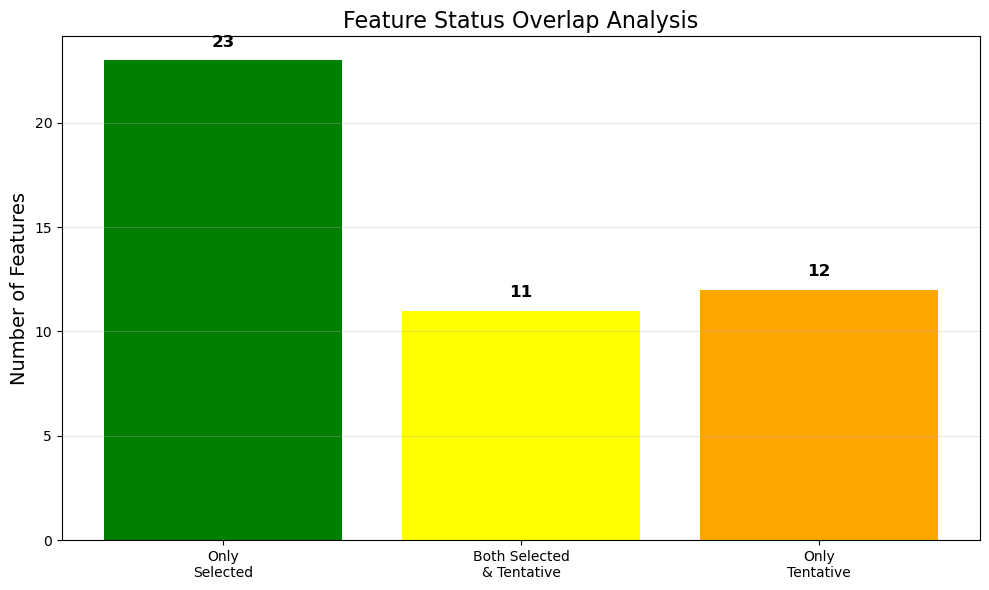

In [41]:
# Analyze feature selection consistency across folds
from collections import defaultdict

# Initialize feature tracking
feature_consistency = defaultdict(lambda: {'selected': 0, 'tentative': 0})
all_features_selected = set()
all_features_tentative = set()

# Collect feature selection results from all folds
for fold_idx in range(1, 6):
    # Get the boruta selector for this fold
    boruta = knn_boruta_selected_data[fold_idx]['boruta_selector']
    X_train = knn_imputed_data[fold_idx]['X_train']
    
    # Get feature names
    feature_names = X_train.columns
    
    # Track selected and tentative features
    for idx, feature in enumerate(feature_names):
        if boruta.support_[idx]:  # Selected
            feature_consistency[feature]['selected'] += 1
            all_features_selected.add(feature)
        if boruta.support_weak_[idx]:  # Tentative
            feature_consistency[feature]['tentative'] += 1
            all_features_tentative.add(feature)

# Calculate the requested statistics
print("="*60)
print("BORUTA FEATURE SELECTION SUMMARY")
print("="*60)

# 1. Total features selected (not tentative) regardless of number of folds
print(f"\n1. Total unique features SELECTED across all folds: {len(all_features_selected)}")

# 2. Total features tentative regardless of number of folds  
print(f"\n2. Total unique features TENTATIVE across all folds: {len(all_features_tentative)}")

# 3-6. Features by number of folds
features_by_fold_count = {
    5: [],
    4: [],
    3: [],
    2: [],
    1: []
}

for feature in all_features_selected:
    count = feature_consistency[feature]['selected']
    features_by_fold_count[count].append(feature)

print(f"\n3. Features selected in ALL 5 folds: {len(features_by_fold_count[5])}")
print(f"\n4. Features selected in 4 folds: {len(features_by_fold_count[4])}")
print(f"\n5. Features selected in 3 folds: {len(features_by_fold_count[3])}")
print(f"\n6. Features selected in ONLY 1 fold: {len(features_by_fold_count[1])}")

# Create visualization showing distribution
plt.figure(figsize=(12, 8))

# Bar plot of features by selection frequency
fold_counts = list(range(1, 6))
feature_counts = [len(features_by_fold_count[i]) for i in fold_counts]

bars = plt.bar(fold_counts, feature_counts, color=['red', 'orange', 'yellow', 'lightgreen', 'darkgreen'])

# Add value labels on bars
for bar, count in zip(bars, feature_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Number of Folds', fontsize=14)
plt.ylabel('Number of Features', fontsize=14)
plt.title('Distribution of Features by Selection Consistency\n(How many folds was each feature selected in?)', fontsize=16)
plt.xticks(fold_counts)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Detailed breakdown
print("\n" + "="*60)
print("DETAILED BREAKDOWN")
print("="*60)

# Show some examples from each category
print("\n--- Features selected in ALL 5 folds (showing first 10) ---")
for i, feature in enumerate(sorted(features_by_fold_count[5])[:10]):
    print(f"  {i+1}. {feature}")
if len(features_by_fold_count[5]) > 10:
    print(f"  ... and {len(features_by_fold_count[5]) - 10} more")

print("\n--- Features selected in 4 folds (showing first 10) ---")
for i, feature in enumerate(sorted(features_by_fold_count[4])[:10]):
    tentative_count = feature_consistency[feature]['tentative']
    print(f"  {i+1}. {feature} (tentative in {tentative_count} fold(s))")
if len(features_by_fold_count[4]) > 10:
    print(f"  ... and {len(features_by_fold_count[4]) - 10} more")

print("\n--- Features selected in ONLY 1 fold (showing first 10) ---")
for i, feature in enumerate(sorted(features_by_fold_count[1])[:10]):
    tentative_count = feature_consistency[feature]['tentative']
    print(f"  {i+1}. {feature} (tentative in {tentative_count} fold(s))")
if len(features_by_fold_count[1]) > 10:
    print(f"  ... and {len(features_by_fold_count[1]) - 10} more")

# Create a pie chart showing the distribution
plt.figure(figsize=(10, 8))
sizes = feature_counts
labels = [f'{count} fold{"s" if count > 1 else ""}\n({size} features)' for count, size in zip(fold_counts, sizes)]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Feature Selection Consistency Distribution\n(Percentage of features by fold count)', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
total_selected = sum(feature_counts)
print(f"Total unique features selected: {total_selected}")
print(f"Highly stable features (5 folds): {len(features_by_fold_count[5])} ({len(features_by_fold_count[5])/total_selected*100:.1f}%)")
print(f"Stable features (4-5 folds): {len(features_by_fold_count[5]) + len(features_by_fold_count[4])} ({(len(features_by_fold_count[5]) + len(features_by_fold_count[4]))/total_selected*100:.1f}%)")
print(f"Unstable features (1-2 folds): {len(features_by_fold_count[1]) + len(features_by_fold_count[2])} ({(len(features_by_fold_count[1]) + len(features_by_fold_count[2]))/total_selected*100:.1f}%)")

# Create a comparison of selected vs tentative
print("\n" + "="*60)
print("SELECTED vs TENTATIVE OVERLAP")
print("="*60)
overlap = all_features_selected.intersection(all_features_tentative)
only_selected = all_features_selected - all_features_tentative
only_tentative = all_features_tentative - all_features_selected

print(f"Features that were ONLY selected (never tentative): {len(only_selected)}")
print(f"Features that were ONLY tentative (never selected): {len(only_tentative)}")
print(f"Features that were BOTH selected and tentative (in different folds): {len(overlap)}")

# Visualize the overlap
plt.figure(figsize=(10, 6))
categories = ['Only\nSelected', 'Both Selected\n& Tentative', 'Only\nTentative']
counts = [len(only_selected), len(overlap), len(only_tentative)]

bars = plt.bar(categories, counts, color=['green', 'yellow', 'orange'])
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Number of Features', fontsize=14)
plt.title('Feature Status Overlap Analysis', fontsize=16)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [42]:
# Find features that were selected at least once but NEVER tentative
selected_never_tentative = []

# First, collect all selected and tentative features by name
all_selected_features = set()
all_tentative_features = set()

for fold_idx in range(1, 6):
    # Get the boruta selector for this fold
    boruta = knn_boruta_selected_data[fold_idx]['boruta_selector']
    X_train = knn_imputed_data[fold_idx]['X_train']
    
    # Get feature names
    feature_names = X_train.columns
    
    # Check each feature
    for idx, feature in enumerate(feature_names):
        if boruta.support_[idx]:  # If selected
            all_selected_features.add(feature)
        if boruta.support_weak_[idx]:  # If tentative
            all_tentative_features.add(feature)

# Find features that were selected but never tentative
selected_never_tentative = all_selected_features - all_tentative_features

print(f"Features selected at least once and NEVER tentative: {len(selected_never_tentative)}")
print("\nList of features:")
for i, feature in enumerate(sorted(selected_never_tentative), 1):
    print(f"{i}. {feature}")

Features selected at least once and NEVER tentative: 23

List of features:
1. col103
2. col104
3. col122
4. col130
5. col131
6. col134
7. col22
8. col248
9. col288
10. col291
11. col299
12. col317
13. col320
14. col337
15. col34
16. col461
17. col511
18. col520
19. col56
20. col574
21. col60
22. col66
23. col91


Execute Random Forest

In [43]:


from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np


In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score,
    precision_score, recall_score
)
import numpy as np
import pandas as pd

fold_scores = []

for fold_idx in range(1, 6):
    # ── A.  Pull data for this fold ────────────────────────────
    X_tr = knn_boruta_selected_data[fold_idx]['X_train']
    X_va = knn_boruta_selected_data[fold_idx]['X_val']
    y_tr = knn_boruta_selected_data[fold_idx]['y_train']
    y_va = knn_boruta_selected_data[fold_idx]['y_val']

    # ── B.  SMOTE only on training split ───────────────────────
    X_tr_res, y_tr_res = SMOTE(random_state=42, n_jobs=-1).fit_resample(X_tr, y_tr)

    # ── C.  Random Forest (max_depth=None is default) ──────────
    rf = RandomForestClassifier(
        n_estimators=500,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_tr_res, y_tr_res)

    #      save model for later reports
    knn_boruta_selected_data[fold_idx]['rf_model'] = rf

    # ── D.  Evaluate on untouched validation data ──────────────
    y_pred  = rf.predict(X_va)
    y_proba = rf.predict_proba(X_va)[:, 1]

    fold_scores.append({
        "fold"      : fold_idx,
        "AUC"       : float(roc_auc_score(y_va, y_proba)),
        "Precision" : float(precision_score(y_va, y_pred, zero_division=0)),
        "Recall"    : float(recall_score(y_va, y_pred, zero_division=0)),
        "F1"        : float(f1_score(y_va, y_pred, zero_division=0)),
        "Accuracy"  : float(accuracy_score(y_va, y_pred)),
        "Pos/Neg after SMOTE": dict(zip(*np.unique(y_tr_res, return_counts=True)))
    })

    print(f"Fold {fold_idx}: "
          f"AUC={fold_scores[-1]['AUC']:.3f} | "
          f"Prec={fold_scores[-1]['Precision']:.3f} | "
          f"Rec={fold_scores[-1]['Recall']:.3f} | "
          f"F1={fold_scores[-1]['F1']:.3f} | "
          f"Acc={fold_scores[-1]['Accuracy']:.3f}")

# ── E.  Cross-fold summary ─────────────────────────────────────
results = pd.DataFrame(fold_scores)

print("\n=== Cross-fold metrics ===")
print(
    results[["AUC", "Precision", "Recall", "F1", "Accuracy"]]
    .describe()
    .loc[["mean", "std"]]
)

print("\nSamples per class after SMOTE in each fold:")
for f in fold_scores:
    print(f"Fold {f['fold']}: {f['Pos/Neg after SMOTE']}")


/opt/anaconda3/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fold 1: AUC=0.692 | Prec=0.120 | Rec=0.143 | F1=0.130 | Acc=0.873


/opt/anaconda3/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fold 2: AUC=0.710 | Prec=0.200 | Rec=0.238 | F1=0.217 | Acc=0.885


/opt/anaconda3/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fold 3: AUC=0.731 | Prec=0.000 | Rec=0.000 | F1=0.000 | Acc=0.895


/opt/anaconda3/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fold 4: AUC=0.676 | Prec=0.214 | Rec=0.143 | F1=0.171 | Acc=0.907


/opt/anaconda3/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Fold 5: AUC=0.696 | Prec=0.154 | Rec=0.190 | F1=0.170 | Acc=0.875

=== Cross-fold metrics ===
           AUC  Precision    Recall        F1  Accuracy
mean  0.700996   0.137626  0.142857  0.137893  0.887056
std   0.020896   0.085560  0.089087  0.083005  0.014280

Samples per class after SMOTE in each fold:
Fold 1: {-1: 1170, 1: 1170}
Fold 2: {-1: 1170, 1: 1170}
Fold 3: {-1: 1170, 1: 1170}
Fold 4: {-1: 1171, 1: 1171}
Fold 5: {-1: 1171, 1: 1171}


In [45]:
import pandas as pd
results = pd.DataFrame(fold_scores)

print("\n=== Cross-fold metrics ===")
print(results[['AUC', 'F1', 'Accuracy']].describe().loc[['mean', 'std']])

# If you want to inspect the class counts after SMOTE:
print("\nSamples per class after SMOTE in each fold:")
for f in fold_scores:
    print(f"Fold {f['fold']}: {f['Pos/Neg after SMOTE']}")



=== Cross-fold metrics ===
           AUC        F1  Accuracy
mean  0.700996  0.137893  0.887056
std   0.020896  0.083005  0.014280

Samples per class after SMOTE in each fold:
Fold 1: {-1: 1170, 1: 1170}
Fold 2: {-1: 1170, 1: 1170}
Fold 3: {-1: 1170, 1: 1170}
Fold 4: {-1: 1171, 1: 1171}
Fold 5: {-1: 1171, 1: 1171}


In [46]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score,
    precision_score, recall_score
)

fold_scores = []

for fold_idx in range(1, 6):
    # ..........................................................
    #  SMOTE → Random Forest  (exactly as before)
    # ..........................................................

    y_pred      = rf.predict(X_va)               # 0 / 1 labels at cutoff 0.5
    y_proba_pos = rf.predict_proba(X_va)[:, 1]   # probabilities

    fold_scores.append({
        'fold'      : fold_idx,
        'AUC'       : roc_auc_score(y_va, y_proba_pos),
        'Accuracy'  : accuracy_score(y_va, y_pred),
        'F1'        : f1_score(y_va, y_pred),
        'Precision' : precision_score(y_va, y_pred, zero_division=0),
        'Recall'    : recall_score(y_va, y_pred, zero_division=0),
        'Pos/Neg after SMOTE' : dict(zip(*np.unique(y_tr_res, return_counts=True)))
    })

    print(f"Fold {fold_idx}: "
          f"AUC={fold_scores[-1]['AUC']:.3f} | "
          f"Prec={fold_scores[-1]['Precision']:.3f} | "
          f"Rec={fold_scores[-1]['Recall']:.3f} | "
          f"F1={fold_scores[-1]['F1']:.3f}")


Fold 1: AUC=0.696 | Prec=0.154 | Rec=0.190 | F1=0.170
Fold 2: AUC=0.696 | Prec=0.154 | Rec=0.190 | F1=0.170
Fold 3: AUC=0.696 | Prec=0.154 | Rec=0.190 | F1=0.170
Fold 4: AUC=0.696 | Prec=0.154 | Rec=0.190 | F1=0.170
Fold 5: AUC=0.696 | Prec=0.154 | Rec=0.190 | F1=0.170


In [47]:
import pandas as pd

results = pd.DataFrame(fold_scores)
summary = results[['AUC','Precision','Recall','F1','Accuracy']].describe().loc[['mean','std']]
print("\n=== Cross-fold metrics ===")
print(summary)



=== Cross-fold metrics ===
           AUC  Precision    Recall        F1      Accuracy
mean  0.695939   0.153846  0.190476  0.170213  8.753994e-01
std   0.000000   0.000000  0.000000  0.000000  1.241267e-16


In [52]:
from sklearn.metrics import classification_report, accuracy_score

for fold_idx in range(1, 6):
    X_va = knn_boruta_selected_data[fold_idx]['X_val']
    y_va = knn_boruta_selected_data[fold_idx]['y_val']
    rf    = knn_boruta_selected_data[fold_idx]['rf_model']   # now exists

    y_pred = rf.predict(X_va)
    acc    = accuracy_score(y_va, y_pred)

    print(f"\nFold {fold_idx} – Validation Accuracy: {acc:.4f}")
    print(classification_report(
        y_va,
        y_pred,
        target_names=["-1.0", "1.0"],   # adjust label strings if needed
        digits=4,
        zero_division=0                 # avoids warnings if no positives predicted
    ))



Fold 1 – Validation Accuracy: 0.8726
              precision    recall  f1-score   support

        -1.0     0.9377    0.9249    0.9313       293
         1.0     0.1200    0.1429    0.1304        21

    accuracy                         0.8726       314
   macro avg     0.5289    0.5339    0.5309       314
weighted avg     0.8830    0.8726    0.8777       314


Fold 2 – Validation Accuracy: 0.8854
              precision    recall  f1-score   support

        -1.0     0.9446    0.9317    0.9381       293
         1.0     0.2000    0.2381    0.2174        21

    accuracy                         0.8854       314
   macro avg     0.5723    0.5849    0.5778       314
weighted avg     0.8948    0.8854    0.8899       314


Fold 3 – Validation Accuracy: 0.8946
              precision    recall  f1-score   support

        -1.0     0.9333    0.9556    0.9444       293
         1.0     0.0000    0.0000    0.0000        20

    accuracy                         0.8946       313
   macro avg  